In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from s3fs import S3FileSystem, S3Map

import cmocean as cm

/opt/tljh/user/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
%matplotlib notebook

In [3]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='large'
plt.rcParams['pcolor.shading']='auto'

In [4]:
# Login to the s3 bucket and list soop folders
# http://imos-data.s3-website-ap-southeast-2.amazonaws.com/?prefix=IMOS/SOOP/SOOP-SST/
fs = S3FileSystem(anon=True)
aodn = fs.ls('imos-data/IMOS/ANFOG/REALTIME/slocum_glider/')
for item in aodn:
    print(item)

imos-data/IMOS/ANFOG/REALTIME/slocum_glider/BassStrait20230518
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/Cairns20230608
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/Cairns20230628
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/Forster20230217
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/Forster20230718
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/Forster220230714
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/MissionBeach20230203
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/MurrayPlume20230225
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef120230424
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef220230424
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/Sydney20230301
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/TasWestCoast20230405
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/TwoRocks20220916
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/TwoRocks20230613
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/Yamba20221123


In [5]:
def open_file_nocache(fname, myfs):
    """
    Load a netcdf file directly from an S3 bucket
    """
    fileobj = myfs.open(fname)
    return xr.open_dataset(fileobj)


In [6]:
aodn = fs.glob('imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/')
for item in aodn:
    print(item)



imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/IMOS_ANFOG_BCEOSTUV_20230425T225910Z_SL248_FV00_timeseries_END-20230520T015856Z.nc
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230424T000000-20230426T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230426T000000-20230428T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230428T000000-20230430T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230430T000000-20230502T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230502T000000-20230504T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230504T000000-20230506T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230506T000000-20230508T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocu

In [8]:
ncfile = aodn[0]
print(ncfile)
ds = open_file_nocache(ncfile, fs)
ds

imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef120230424/IMOS_ANFOG_BCEOSTUV_20230424T222320Z_SL210_FV00_timeseries_END-20230518T231521Z.nc


<xarray.Dataset>
Dimensions:                    (TIME: 43549)
Coordinates:
  * TIME                       (TIME) datetime64[ns] 2023-04-24T22:23:20.8030...
    LATITUDE                   (TIME) float64 ...
    LONGITUDE                  (TIME) float64 ...
    DEPTH                      (TIME) float64 ...
Data variables: (12/36)
    PLATFORM                   |S1 ...
    DEPLOYMENT                 |S1 ...
    SENSOR1                    |S1 ...
    SENSOR2                    |S1 ...
    SENSOR3                    |S1 ...
    SENSOR4                    |S1 ...
    ...                         ...
    IRRAD490                   (TIME) float64 ...
    IRRAD490_quality_control   (TIME) float32 ...
    IRRAD555                   (TIME) float64 ...
    IRRAD555_quality_control   (TIME) float32 ...
    IRRAD670                   (TIME) float64 ...
    IRRAD670_quality_control   (TIME) float32 ...
Attributes: (12/43)
    project:                       Integrated Marine Observing System (IMOS)
    institution:                   ANFOG (Australian National Facility for Oc...
    references:                    http://www.imos.org.au; "ANFOG Data Manage...
    naming_authority:              IMOS
    cdm_data_type:                 Trajectory
    data_centre:                   Australian Ocean Data Network (AODN)
    ...                            ...
    geospatial_lon_max:            123.9376
    geospatial_lat_min:            -13.0362
    geospatial_lat_max:            -12.6009
    time_coverage_start:           2023-04-24T22:23:20Z
    time_coverage_end:             2023-05-18T23:15:21Z
    history:                       2023-05-19T00:19:41Z Written by MATLAB scr...

In [9]:
# Crop near-surface only
myds = ds.where(ds['DEPTH']<10)

<IPython.core.display.Javascript object>


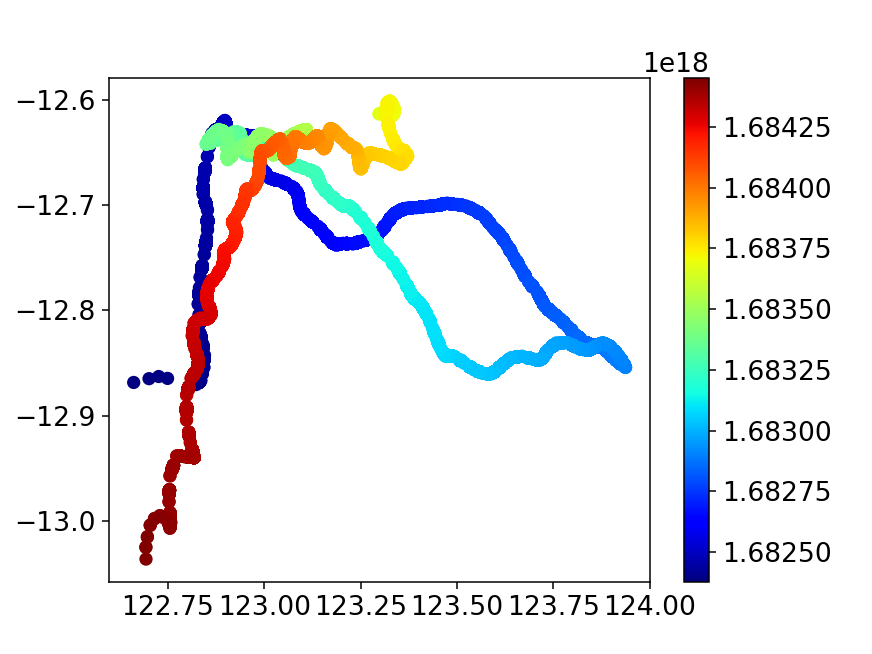

In [10]:
plt.figure()
plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['TIME'],
           cmap='jet',
           )
plt.colorbar()

<IPython.core.display.Javascript object>


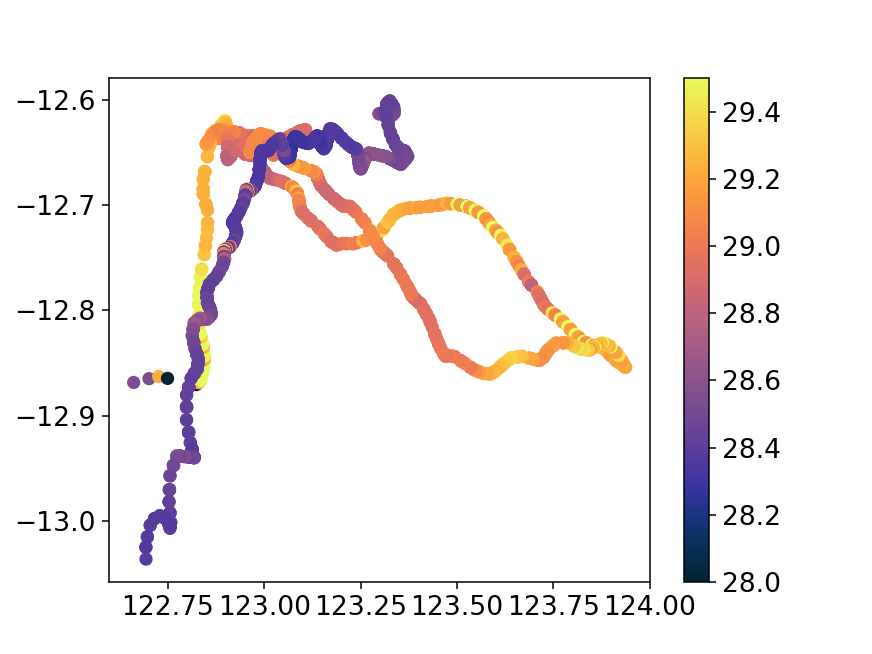

In [11]:
plt.figure()
plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['TEMP'],
           cmap=cm.cm.thermal,
           vmin=28.0, vmax=29.5)
plt.colorbar()

<IPython.core.display.Javascript object>


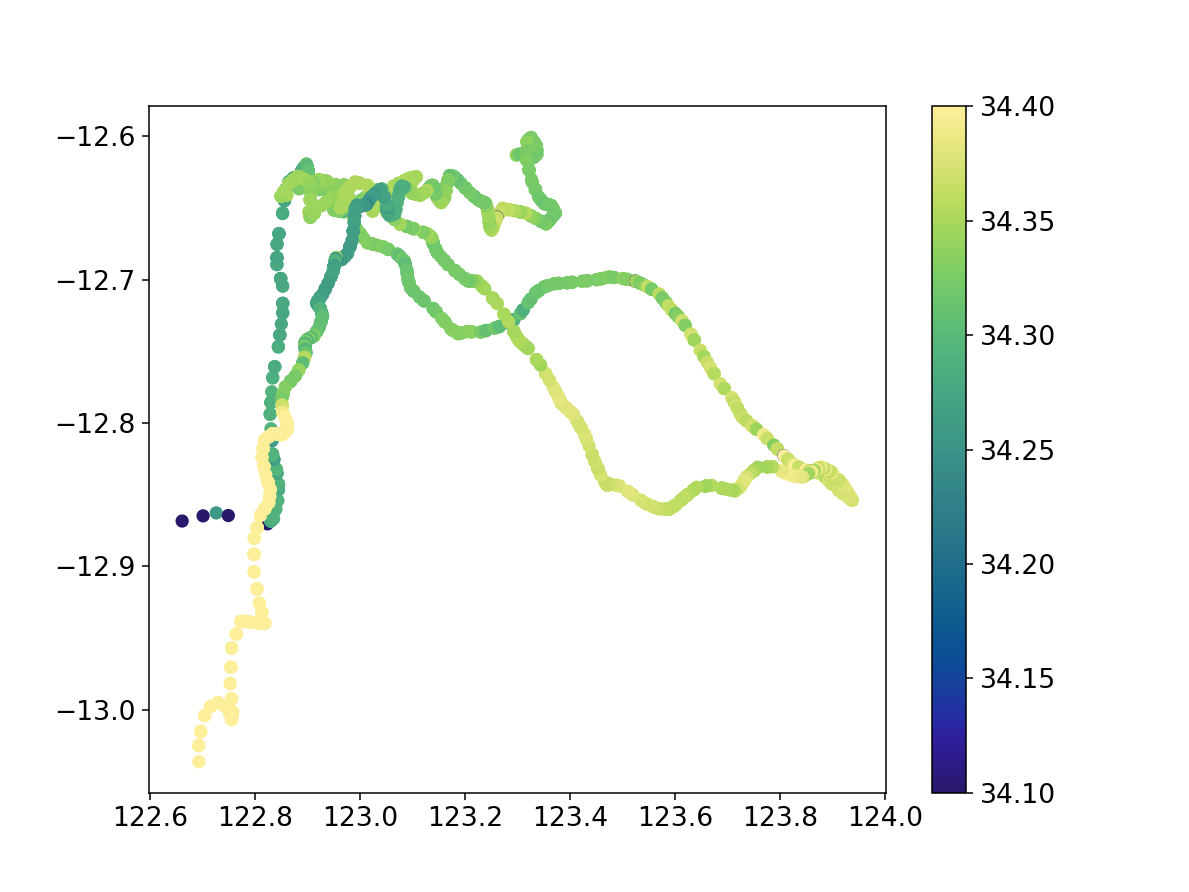

In [12]:
plt.figure()
plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['PSAL'],
           cmap=cm.cm.haline,
           vmin=34.1, vmax=34.4)
plt.colorbar()

<IPython.core.display.Javascript object>


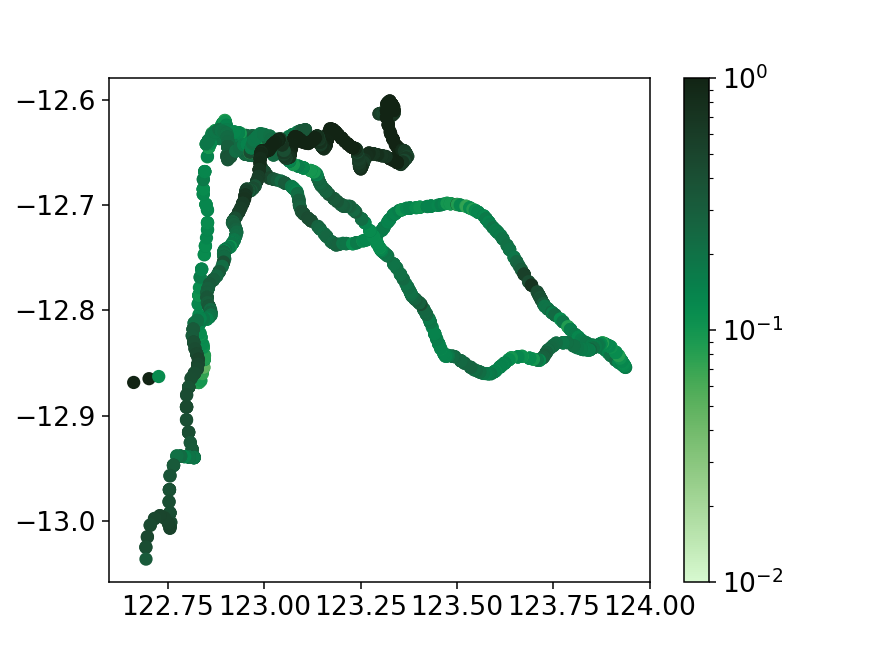

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  


In [13]:
from matplotlib.colors import LogNorm
plt.figure()
plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['CPHL'],
           cmap=cm.cm.algae,
           vmin=1e-2, vmax=1,
           norm=LogNorm())
plt.colorbar()

In [15]:
# Plot the tracks of all 3 gliders on a basemap

aodn = fs.glob('imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef*/*.nc')
for item in aodn:
    print(item)

imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef120230424/IMOS_ANFOG_BCEOSTUV_20230424T222320Z_SL210_FV00_timeseries_END-20230518T231521Z.nc
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef220230424/IMOS_ANFOG_BCEOSTUV_20230424T222048Z_SL286_FV00_timeseries_END-20230519T014049Z.nc
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/IMOS_ANFOG_BCEOSTUV_20230425T225910Z_SL248_FV00_timeseries_END-20230520T015856Z.nc


In [16]:
from utils import plot_swot_basemap, open_mfile_nocache

In [25]:
# ds_all = open_mfile_nocache(aodn, fs)
ds_all = [open_file_nocache(ff, fs) for ff in aodn]
myds_all = [ds.where(ds['DEPTH']<10) for ds in ds_all]
myds_all[0]

<xarray.Dataset>
Dimensions:                    (TIME: 43549)
Coordinates:
  * TIME                       (TIME) datetime64[ns] 2023-04-24T22:23:20.8030...
    LATITUDE                   (TIME) float64 nan -12.87 ... -13.03 -13.04
    LONGITUDE                  (TIME) float64 nan 122.7 122.7 ... 122.7 122.7
    DEPTH                      (TIME) float64 nan -0.04971 ... 0.169 0.169
Data variables: (12/36)
    PLATFORM                   (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    DEPLOYMENT                 (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    SENSOR1                    (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    SENSOR2                    (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    SENSOR3                    (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    SENSOR4                    (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    ...                         ...
    IRRAD490                   (TIME) float64 nan 0.0 0.0 ... 2.074 2.455 35.91
    IRRAD490_quality_control   (TIME) float32 nan 0.0 0.0 0.0 ... 0.0 0.0 0.0
    IRRAD555                   (TIME) float64 nan 0.0 0.0 ... 1.97 2.077 56.17
    IRRAD555_quality_control   (TIME) float32 nan 0.0 0.0 0.0 ... 0.0 0.0 0.0
    IRRAD670                   (TIME) float64 nan 0.0 0.0 ... 2.291 1.881 32.49
    IRRAD670_quality_control   (TIME) float32 nan 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/43)
    project:                       Integrated Marine Observing System (IMOS)
    institution:                   ANFOG (Australian National Facility for Oc...
    references:                    http://www.imos.org.au; "ANFOG Data Manage...
    naming_authority:              IMOS
    cdm_data_type:                 Trajectory
    data_centre:                   Australian Ocean Data Network (AODN)
    ...                            ...
    geospatial_lon_max:            123.9376
    geospatial_lat_min:            -13.0362
    geospatial_lat_max:            -12.6009
    time_coverage_start:           2023-04-24T22:23:20Z
    time_coverage_end:             2023-05-18T23:15:21Z
    history:                       2023-05-19T00:19:41Z Written by MATLAB scr...

<IPython.core.display.Javascript object>


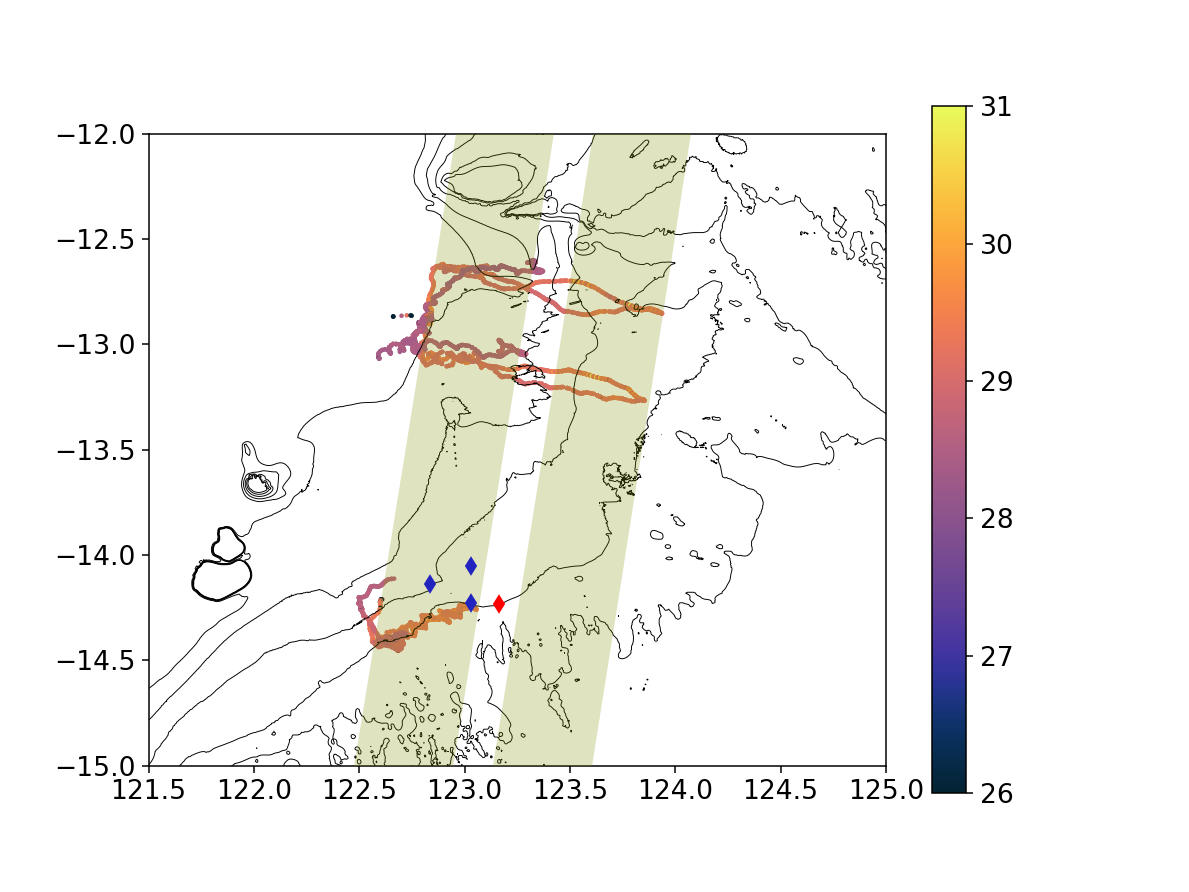

In [27]:
xlims = (121.5, 125)
ylims = (-15,-12)

plt.figure()
ax=plt.subplot(111)
plot_swot_basemap(ax, xlims, ylims)

for myds in myds_all:
    plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['TEMP'],
               cmap=cm.cm.thermal, s=2, vmin=26, vmax=31)
plt.colorbar()
plt.savefig('../FIGURES/IMOS_Glider_SST_SWOT_Cruise.png', dpi=150)

<IPython.core.display.Javascript object>


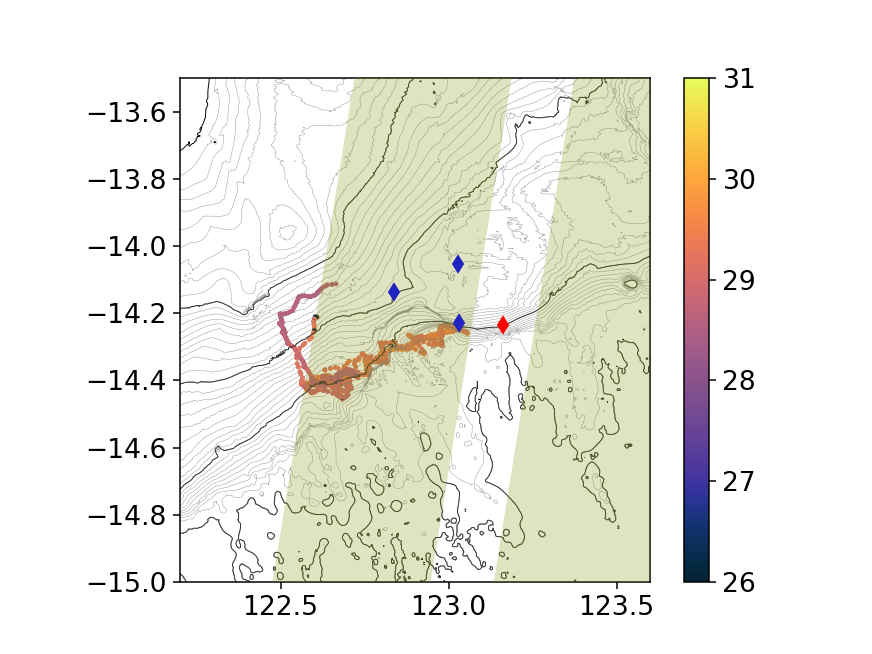

In [28]:
xlims = (122.2, 123.6)
ylims = (-15,-13.5)

plt.figure()
ax=plt.subplot(111)
plot_swot_basemap(ax, xlims, ylims, fine_contours=True)

for myds in myds_all:
    plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['TEMP'],
               cmap=cm.cm.thermal, s=2, vmin=26, vmax=31)
plt.colorbar()
plt.savefig('../FIGURES/IMOS_Glider_SST_SWOT_Cruise_zoom01.png', dpi=150)

<IPython.core.display.Javascript object>


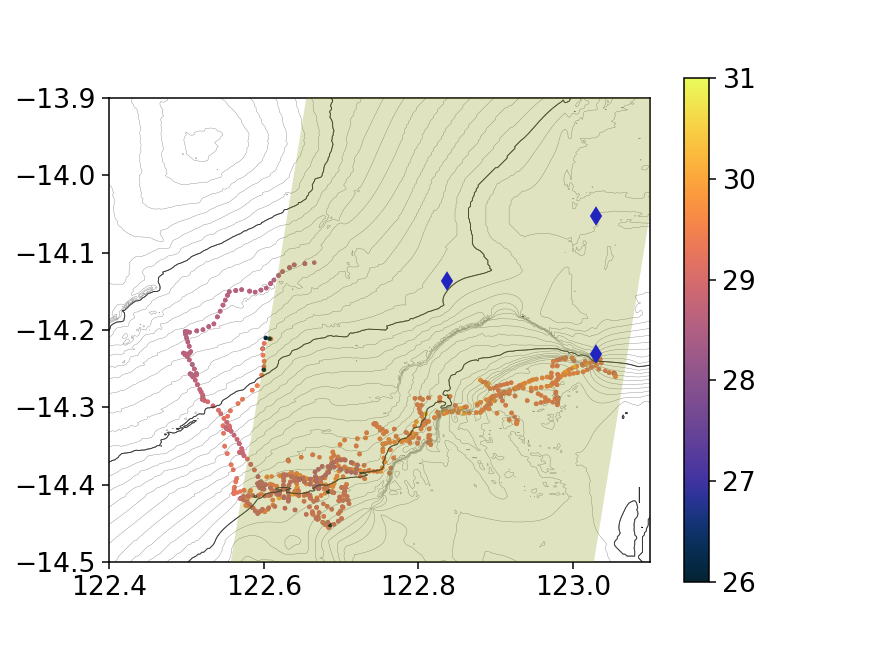

In [30]:
xlims = (122.4, 123.1)
ylims = (-14.5,-13.9)

plt.figure()
ax=plt.subplot(111)
plot_swot_basemap(ax, xlims, ylims, fine_contours=True)

for myds in myds_all:
    plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['TEMP'],
               cmap=cm.cm.thermal, s=2, vmin=26, vmax=31)
plt.colorbar()
plt.savefig('../FIGURES/IMOS_Glider_SST_SWOT_Cruise_zoom02.png', dpi=150)